In [23]:
import pandas as pd
monthly_population=pd.read_csv("데이터파일/시도별_인구수_Dataset/지자체별 월 총 인구수.csv",index_col=0,thousands=',')

In [24]:
import pandas as pd
import re

# 데이터 불러오기
df = monthly_population

# 컬럼 이름 변경 함수
def rename_column(col_name):
    if '월_계_총인구수' in col_name:
        match = re.search(r'(\d{4})년(\d{2})월', col_name)
        if match:
            year, month = match.groups()
            return f"{year}-{month}-01"
    return col_name

# 컬럼 이름 변경
df.columns = [rename_column(col) for col in df.columns]

# '행정구역' 컬럼과 변경된 날짜 형식의 컬럼만 선택
date_columns = [col for col in df.columns if re.match(r'\d{4}-\d{2}-01', col)]
monthly_population = df[['행정구역'] + date_columns]

# 결과 확인
print(monthly_population.head())
print(monthly_population.columns)

# 결과를 CSV 파일로 저장 (인덱스 제외)
monthly_population.to_csv("monthly_population_renamed.csv", index=False, encoding='utf-8-sig')

                     행정구역  2020-01-01  2020-02-01  2020-03-01  2020-04-01  \
0     서울특별시  (1100000000)     9733509     9736962     9733655     9726787   
1  서울특별시 종로구 (1111000000)      151215      151309      151217      150936   
2   서울특별시 중구 (1114000000)      126201      126259      126175      126126   
3  서울특별시 용산구 (1117000000)      229385      229677      229579      229369   
4  서울특별시 성동구 (1120000000)      300410      299797      299042      298249   

   2020-05-01  2020-06-01  2020-07-01  2020-08-01  2020-09-01  ...  \
0     9724496     9720846     9715429     9708247     9699232  ...   
1      150623      150383      150183      149962      149952  ...   
2      126120      126092      125970      125990      125800  ...   
3      229393      229431      229432      229362      229786  ...   
4      297820      297397      296896      296183      295591  ...   

   2023-07-01  2023-08-01  2023-09-01  2023-10-01  2023-11-01  2023-12-01  \
0   9411260.0   9409466.0   9407540.0  

In [25]:
monthly_population.head()

,행정구역,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,...,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01
0,서울특별시 (1100000000),9733509,9736962,9733655,9726787,9724496,9720846,9715429,9708247,9699232,...,9411260.0,9409466.0,9407540.0,9400249.0,9390925.0,9386034.0,9384325.0,9386705.0,9384739.0,9378269.0
1,서울특별시 종로구 (1111000000),151215,151309,151217,150936,150623,150383,150183,149962,149952,...,140206.0,140032.0,139945.0,139606.0,139497.0,139417.0,139378.0,139471.0,139498.0,139432.0
2,서울특별시 중구 (1114000000),126201,126259,126175,126126,126120,126092,125970,125990,125800,...,121460.0,121482.0,121405.0,121300.0,121230.0,121312.0,121322.0,121419.0,121602.0,121607.0
3,서울특별시 용산구 (1117000000),229385,229677,229579,229369,229393,229431,229432,229362,229786,...,217042.0,216547.0,216152.0,215397.0,214381.0,213151.0,212175.0,211247.0,209849.0,207969.0
4,서울특별시 성동구 (1120000000),300410,299797,299042,298249,297820,297397,296896,296183,295591,...,279142.0,278750.0,278366.0,278035.0,277701.0,277361.0,277090.0,276952.0,276964.0,276847.0


In [26]:
import pandas as pd
import numpy as np

# 숫자 데이터를 포함하는 컬럼만 선택
numeric_columns = monthly_population.select_dtypes(include=[np.number]).columns

# '행정구역' 컬럼이 숫자 컬럼에 포함되어 있다면 제거
if '행정구역' in numeric_columns:
    numeric_columns = numeric_columns.drop('행정구역')

# 각 행정구역별 평균 계산 (NA 값 제외)
averages = monthly_population[numeric_columns].mean(axis=1, skipna=True)

# 평균값의 소수점 버리기 (NA 값 처리)
averages = averages.fillna(0).apply(np.floor)

# NA 값을 평균으로 대체하는 함수
def replace_na_with_average(row):
    avg = averages[row.name]
    return row.fillna(avg)

# 숫자 컬럼에 대해서만 NA 값 대체 함수 적용
monthly_population[numeric_columns] = monthly_population[numeric_columns].apply(replace_na_with_average, axis=1)

# 결과를 정수로 변환 (NA 값은 0으로 처리)
monthly_population[numeric_columns] = monthly_population[numeric_columns].fillna(0).astype(int)

# 결과 확인
print(monthly_population.head())
print("\nNA 값 개수:")
print(monthly_population.isna().sum().sum())

                     행정구역  2020-01-01  2020-02-01  2020-03-01  2020-04-01  \
0     서울특별시  (1100000000)     9733509     9736962     9733655     9726787   
1  서울특별시 종로구 (1111000000)      151215      151309      151217      150936   
2   서울특별시 중구 (1114000000)      126201      126259      126175      126126   
3  서울특별시 용산구 (1117000000)      229385      229677      229579      229369   
4  서울특별시 성동구 (1120000000)      300410      299797      299042      298249   

   2020-05-01  2020-06-01  2020-07-01  2020-08-01  2020-09-01  ...  \
0     9724496     9720846     9715429     9708247     9699232  ...   
1      150623      150383      150183      149962      149952  ...   
2      126120      126092      125970      125990      125800  ...   
3      229393      229431      229432      229362      229786  ...   
4      297820      297397      296896      296183      295591  ...   

   2023-07-01  2023-08-01  2023-09-01  2023-10-01  2023-11-01  2023-12-01  \
0     9411260     9409466     9407540  

In [27]:
# NA 값이 있는 행 확인
rows_with_na = monthly_population[monthly_population.isna().any(axis=1)]

# NA 값의 총 개수
total_na = monthly_population.isna().sum().sum()

# 컬럼별 NA 값의 개수
na_by_column = monthly_population.isna().sum()

# 결과 출력
print(f"총 NA 값의 개수: {total_na}")
print("\n컬럼별 NA 값의 개수:")
print(na_by_column[na_by_column > 0])  # NA가 있는 컬럼만 출력

print(f"\nNA 값이 있는 행의 수: {len(rows_with_na)}")

# NA 값이 있는 첫 몇 개의 행 출력
print("\nNA 값이 있는 행의 예시 (처음 5개):")
print(rows_with_na.head())

# NA 값의 위치 확인
na_locations = monthly_population.isna()
print("\nNA 값의 위치 (처음 5개 행):")
print(na_locations.head())

총 NA 값의 개수: 0

컬럼별 NA 값의 개수:
Series([], dtype: int64)

NA 값이 있는 행의 수: 0

NA 값이 있는 행의 예시 (처음 5개):
Empty DataFrame
Columns: [행정구역, 2020-01-01, 2020-02-01, 2020-03-01, 2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01, 2020-08-01, 2020-09-01, 2020-10-01, 2020-11-01, 2020-12-01, 2021-01-01, 2021-02-01, 2021-03-01, 2021-04-01, 2021-05-01, 2021-06-01, 2021-07-01, 2021-08-01, 2021-09-01, 2021-10-01, 2021-11-01, 2021-12-01, 2022-01-01, 2022-02-01, 2022-03-01, 2022-04-01, 2022-05-01, 2022-06-01, 2022-07-01, 2022-08-01, 2022-09-01, 2022-10-01, 2022-11-01, 2022-12-01, 2023-07-01, 2023-08-01, 2023-09-01, 2023-10-01, 2023-11-01, 2023-12-01, 2024-01-01, 2024-02-01, 2024-03-01, 2024-04-01]
Index: []

[0 rows x 47 columns]

NA 값의 위치 (처음 5개 행):
    행정구역  2020-01-01  2020-02-01  2020-03-01  2020-04-01  2020-05-01  \
0  False       False       False       False       False       False   
1  False       False       False       False       False       False   
2  False       False       False       False     

In [28]:
import pandas as pd

# NA 값이 있는 행 찾기
rows_with_na = monthly_population[monthly_population.isna().any(axis=1)]

# NA 값이 있는 행의 총 개수
total_rows_with_na = len(rows_with_na)

# NA가 있는 행의 '행정구역' 데이터 추출
admin_areas_with_na = rows_with_na['행정구역']

# 중복 제거하고 정렬된 행정구역 목록
unique_admin_areas = sorted(admin_areas_with_na.unique())

# 결과 출력
print(f"총 {total_rows_with_na}개의 행에 NA 값이 존재합니다.")
print(f"이는 {len(unique_admin_areas)}개의 고유한 행정구역에 해당합니다.")
print(f"전체 데이터의 {total_rows_with_na / len(monthly_population):.2%}가 NA 값을 포함하고 있습니다.")

print("\nNA 값이 있는 행의 행정구역 목록:")
for area in unique_admin_areas:
    count = admin_areas_with_na[admin_areas_with_na == area].count()
    print(f"{area}: {count}개 행")

# NA 값이 가장 많은 상위 5개 행정구역
na_counts = rows_with_na.groupby('행정구역').size().sort_values(ascending=False)
print("\nNA 값이 가장 많은 상위 5개 행정구역:")
print(na_counts.head())

# 컬럼별 NA 값의 개수
na_by_column = monthly_population.isna().sum()
print("\n컬럼별 NA 값의 개수:")
print(na_by_column[na_by_column > 0])  # NA가 있는 컬럼만 출력

총 0개의 행에 NA 값이 존재합니다.
이는 0개의 고유한 행정구역에 해당합니다.
전체 데이터의 0.00%가 NA 값을 포함하고 있습니다.

NA 값이 있는 행의 행정구역 목록:

NA 값이 가장 많은 상위 5개 행정구역:
Series([], dtype: int64)

컬럼별 NA 값의 개수:
Series([], dtype: int64)


In [30]:
monthly_population.to_csv("population_fillna.csv")

In [32]:
import seaborn as sns

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

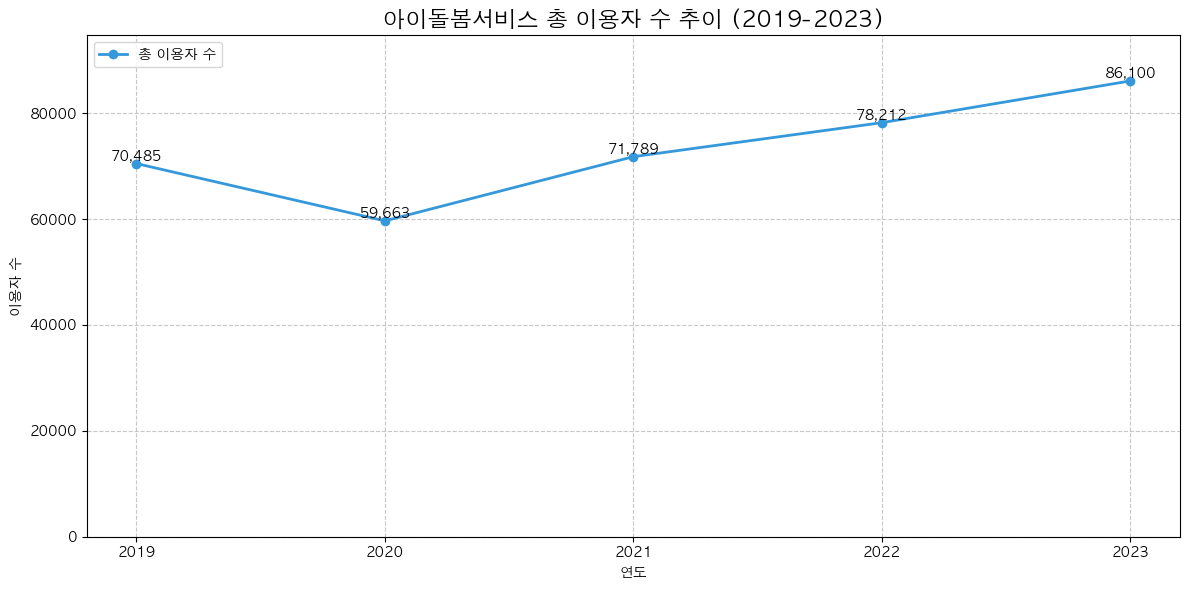

In [39]:
import matplotlib.pyplot as plt
import numpy as np

years = [2019, 2020, 2021, 2022, 2023]
normal = [66783, 56525, 57454, 61138, 66515]
disabled = [3702, 3138, 2617, 2760, 1890]
other = [0, 0, 11718, 14314, 17695]

# 총 이용자 수 계산
total_users = np.array(normal) + np.array(disabled) + np.array(other)

fig, ax = plt.subplots(figsize=(12, 6))

# 선 그래프 그리기
ax.plot(years, total_users, marker='o', linewidth=2, color='#3498db', label='총 이용자 수')

# 각 데이터 포인트에 값 표시
for i, v in enumerate(total_users):
    ax.text(years[i], v, f'{v:,}', ha='center', va='bottom')

ax.set_xlabel('연도', fontweight='bold')
ax.set_ylabel('이용자 수', fontweight='bold')
ax.tick_params(axis='y')
ax.legend(loc='upper left')

# y축 범위 설정 (0부터 시작)
ax.set_ylim(0, max(total_users) * 1.1)

# x축 눈금을 정수 연도로 설정
plt.xticks(years)

plt.title('아이돌봄서비스 총 이용자 수 추이 (2019-2023)', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years = [2019, 2020, 2021, 2022, 2023]
time_use = [71.8, 87.4, 87.9, 83.1, 85.6]
normal = [66783, 56525, 57454, 61138, 66515]
disabled = [3702, 3138, 2617, 2760, 1890]
other = [0, 0, 11718, 14314, 17695]

fig, ax1 = plt.subplots(figsize=(12, 6))

# 개선된 색상 사용
ax1.bar(years, normal, label='시간제', color='#3498db')  # 부드러운 파랑
ax1.bar(years, disabled, bottom=normal, label='종일제', color='#2ecc71')  # 밝은 초록
ax1.bar(years, other, bottom=np.array(normal) + np.array(disabled), label='기타', color='#e74c3c')  # 부드러운 빨강

ax1.set_xlabel('연도', fontweight='bold')
ax1.set_ylabel('이용자 수', fontweight='bold')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(years, time_use, color='#9b59b6', marker='o', linewidth=2, label='가구별 월평균 이용시간')  # 보라색
ax2.set_ylabel('가구별 월평균 이용시간', fontweight='bold')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('아이돌봄서비스 이용 현황 (2019-2023)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()